# Chapter 8 - File Handling

*(C) Copyright Notice: This chapter is part of the book available at https://pp4e-book.github.io/ and copying, distributing, modifying it requires explicit permission from the authors. See the book page for details: https://pp4e-book.github.io/*

All variables used in a program are kept in the main memory and they are **volatile**, i.e., their values are lost when the program ends. Even if you write a program running forever, your data will be lost in case of a shutdown or a power failure.

Another drawback of the main memory is the capacity limitation. In the extreme case, when you need more than a couple of gigabytes for your variables, it will be difficult to keep all of them in the main memory. Especially, infrequently required variables are better kept on an external storage device instead of the main memory.

**Files** provide a mechanism for storing data **persistently** in hard drives which provide significantly larger storage than the main memory. These devices are also called _secondary storage_ devices. The data you put in a file will stay on the hard drive until someone overwrites or deletes the file (or when the hard drive fails, which is a sad but rare case).

A **File** is a sequence of bytes stored on the secondary storage, typically hard drive (alternative secondary storage devices include CD, DVD, USB disk, tape drive). Data on a file has the following differences from data in memory (variables):

1. A file is just a sequence of bytes. Therefore, data in a file is unorganized, there is no data type, no variable boundaries. 

1. Data needs to be be accessed indirectly, using I/O functions. E.g. updating a value in a file requires reading it in memory, updating in memory, then writing it into the file back.

1. Accessing and updating data is significantly slower since it is on an external device.

Keeping data on a file instead of the main memory has the following use cases:

1. Data needs to be persistent. Data will be in the file when you restart your program, reboot your machine or when you find your ancient laptop in the basement 30 years later (Probably it will not be there when a 3000BC archeologist finds your laptop on an excavation site. Hard disks are not that durable. So, persistency is bounded).

2. You need to exchange data with another program. Examples: 
   * You download data from web and your program gets it as input. 
   * You like to generate data in your program and put it on a spreadsheet for further processing.

3. You have large amount of data which does not fit in the main memory. In this case, you will probably use a library or software like a database management system to access data in a faster and organized way. Files are the most primitive, basic way of achieving it.

In this chapter, we will talk about simple file access so that you will learn about simple file operations like open, close, read, write. The examples of the chapter will create and modify files when run -- we strongly encourage you to check the contents of the created files using the file access mechanism at the left-hand side.

## 8.1 First Example

Let us quickly look at a simple example to get a feeling for the different steps involved in working with files.

In [ ]:
fpointer = open('firstexample.txt',"w")
fpointer.write("hello\n")
fpointer.write("how are\n")
fpointer.write("you?\n")
fpointer.close()


The program above will create a file in the current directory with filename `firstexample.txt`. You can open it with your favorite text editor (there are plenty of text editors for operating systems: notepad, wordpad, textedit, nano, vim) to see and edit it. The content will look like this:

```
hello
how are
you?
```

First line of the program is `fpointer = open('firstexample.txt',"w")`. This line opens the file named `firstexample.txt` for writing to it. If the file exists, its content will be erased (it will be an empty file afterwards). The result of `open()` is a file object that we will use in the following lines. This object is assigned to variable `fpointer`.

In the following lines, all functions we call with this file object `fpointer` will work on this file (i.e. `firstexample.txt`). This special *dot* notation helps us with calling functions in scope of the file. `fpointer.`*functionname*`()` will call the *functionname* function for this file. `write(string)` function will write the `string` content to the file. Each call to `write(string)` will append the `string` to the file and the file will grow. At the end, when we are done, we call `close()` to finish accessing the file so that your operating system will know and do necessary actions about it. All open files will be closed when your program terminates. However, calling `close()` after finishing writing is a good programming practice.

Now, let us read this file:

In [ ]:
fp = open("firstexample.txt","r")
content = fp.read()
fp.close()
print(content)

hello
how are
you?



In this case, we called `open()` with argument `"r"` which tells that we are going to read the file (or use it as an input source). If you skip the second argument in `open()`, it is assumed to be `"r"`, so `open("firstexample.txt")` will be equivalent. The `read()` call gets an optional argument, which is the number of bytes to read. If you skip it, it will read the whole file content and return it as a string. Therefore, after the call, the `content` variable will be a string with the file content. 

## 8.2 Files and Sequential Access

A file consists of bytes and `read/write` operations access those bytes **sequentially**. In sequential access, the current I/O operation updates the file state so that next I/O operation will resume from the end of the current I/O operation.

Assume you have an old MP3 player that supports only *play me next 10 seconds* operation on a button. Pressing it will play the next 10 seconds of the song.  When you press again, it will resume from where it is left and play another 10 seconds. This follows until the song is over. The sequential access is like this. A *file pointer* keeps the current offset of the file and each I/O operation advances it so that next call will read or write from this new offset -- see the following Figure.



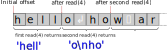

In [ ]:
#@title Sequential Read of a File
%%SVG
<?xml version="1.0" encoding="UTF-8" standalone="no"?>
<!-- Created with Inkscape (http://www.inkscape.org/) -->

<svg
   xmlns:dc="http://purl.org/dc/elements/1.1/"
   xmlns:cc="http://creativecommons.org/ns#"
   xmlns:rdf="http://www.w3.org/1999/02/22-rdf-syntax-ns#"
   xmlns:svg="http://www.w3.org/2000/svg"
   xmlns="http://www.w3.org/2000/svg"
   xmlns:xlink="http://www.w3.org/1999/xlink"
   xmlns:sodipodi="http://sodipodi.sourceforge.net/DTD/sodipodi-0.dtd"
   xmlns:inkscape="http://www.inkscape.org/namespaces/inkscape"
   width="168.06572mm"
   height="50.76865mm"
   viewBox="0 0 168.06572 50.76865"
   version="1.1"
   id="svg8"
   inkscape:version="0.92.4 (5da689c313, 2019-01-14)"
   sodipodi:docname="file-sequential-read.svg">
  <defs
     id="defs2">
    <marker
       inkscape:stockid="Arrow2Lend"
       orient="auto"
       refY="0"
       refX="0"
       id="Arrow2Lend"
       style="overflow:visible"
       inkscape:isstock="true">
      <path
         id="path4712"
         style="fill:#ad0000;fill-opacity:1;fill-rule:evenodd;stroke:#ad0000;stroke-width:0.625;stroke-linejoin:round;stroke-opacity:1"
         d="M 8.7185878,4.0337352 -2.2072895,0.01601326 8.7185884,-4.0017078 c -1.7454984,2.3720609 -1.7354408,5.6174519 -6e-7,8.035443 z"
         transform="matrix(-1.1,0,0,-1.1,-1.1,0)"
         inkscape:connector-curvature="0" />
    </marker>
    <marker
       inkscape:stockid="Arrow2Lend"
       orient="auto"
       refY="0"
       refX="0"
       id="Arrow2Lend-3"
       style="overflow:visible"
       inkscape:isstock="true">
      <path
         inkscape:connector-curvature="0"
         id="path4712-0"
         style="fill:#ad0000;fill-opacity:1;fill-rule:evenodd;stroke:#ad0000;stroke-width:0.625;stroke-linejoin:round;stroke-opacity:1"
         d="M 8.7185878,4.0337352 -2.2072895,0.01601326 8.7185884,-4.0017078 c -1.7454984,2.3720609 -1.7354408,5.6174519 -6e-7,8.035443 z"
         transform="matrix(-1.1,0,0,-1.1,-1.1,0)" />
    </marker>
    <marker
       inkscape:stockid="Arrow2Lend"
       orient="auto"
       refY="0"
       refX="0"
       id="Arrow2Lend-2"
       style="overflow:visible"
       inkscape:isstock="true">
      <path
         inkscape:connector-curvature="0"
         id="path4712-5"
         style="fill:#ad0000;fill-opacity:1;fill-rule:evenodd;stroke:#ad0000;stroke-width:0.625;stroke-linejoin:round;stroke-opacity:1"
         d="M 8.7185878,4.0337352 -2.2072895,0.01601326 8.7185884,-4.0017078 c -1.7454984,2.3720609 -1.7354408,5.6174519 -6e-7,8.035443 z"
         transform="matrix(-1.1,0,0,-1.1,-1.1,0)" />
    </marker>
  </defs>
  <sodipodi:namedview
     id="base"
     pagecolor="#ffffff"
     bordercolor="#666666"
     borderopacity="1.0"
     inkscape:pageopacity="0.0"
     inkscape:pageshadow="2"
     inkscape:zoom="0.98994949"
     inkscape:cx="512.28741"
     inkscape:cy="113.11901"
     inkscape:document-units="mm"
     inkscape:current-layer="layer1"
     showgrid="false"
     inkscape:window-width="1920"
     inkscape:window-height="1010"
     inkscape:window-x="0"
     inkscape:window-y="33"
     inkscape:window-maximized="1"
     fit-margin-top="0"
     fit-margin-left="0"
     fit-margin-right="0"
     fit-margin-bottom="0" />
  <metadata
     id="metadata5">
    <rdf:RDF>
      <cc:Work
         rdf:about="">
        <dc:format>image/svg+xml</dc:format>
        <dc:type
           rdf:resource="http://purl.org/dc/dcmitype/StillImage" />
        <dc:title></dc:title>
      </cc:Work>
    </rdf:RDF>
  </metadata>
  <g
     inkscape:label="Layer 1"
     inkscape:groupmode="layer"
     id="layer1"
     transform="translate(-10.528046,-14.976439)">
    <rect
       id="rect3713"
       width="12.095239"
       height="12.095239"
       x="22.678572"
       y="28.636904"
       style="fill:#cccccc;stroke:#000000;stroke-width:0.26458332"
       inkscape:tile-cx="28.72619"
       inkscape:tile-cy="34.684522"
       inkscape:tile-w="12.359822"
       inkscape:tile-h="12.359822"
       inkscape:tile-x0="22.54628"
       inkscape:tile-y0="28.504611" />
    <use
       x="0"
       y="0"
       inkscape:tiled-clone-of="#rect3713"
       xlink:href="#rect3713"
       id="use3735"
       width="100%"
       height="100%" />
    <use
       x="0"
       y="0"
       inkscape:tiled-clone-of="#rect3713"
       xlink:href="#rect3713"
       transform="translate(12.359822)"
       id="use3737"
       width="100%"
       height="100%" />
    <use
       x="0"
       y="0"
       inkscape:tiled-clone-of="#rect3713"
       xlink:href="#rect3713"
       transform="translate(24.719643)"
       id="use3739"
       width="100%"
       height="100%" />
    <use
       x="0"
       y="0"
       inkscape:tiled-clone-of="#rect3713"
       xlink:href="#rect3713"
       transform="translate(37.079465)"
       id="use3741"
       width="100%"
       height="100%" />
    <use
       x="0"
       y="0"
       inkscape:tiled-clone-of="#rect3713"
       xlink:href="#rect3713"
       transform="translate(49.439287)"
       id="use3743"
       width="100%"
       height="100%" />
    <use
       x="0"
       y="0"
       inkscape:tiled-clone-of="#rect3713"
       xlink:href="#rect3713"
       transform="translate(61.799109)"
       id="use3745"
       width="100%"
       height="100%" />
    <use
       x="0"
       y="0"
       inkscape:tiled-clone-of="#rect3713"
       xlink:href="#rect3713"
       transform="translate(74.15893)"
       id="use3747"
       width="100%"
       height="100%" />
    <use
       x="0"
       y="0"
       inkscape:tiled-clone-of="#rect3713"
       xlink:href="#rect3713"
       transform="translate(86.518752)"
       id="use3749"
       width="100%"
       height="100%" />
    <use
       x="0"
       y="0"
       inkscape:tiled-clone-of="#rect3713"
       xlink:href="#rect3713"
       transform="translate(98.878574)"
       id="use3751"
       width="100%"
       height="100%" />
    <use
       x="0"
       y="0"
       inkscape:tiled-clone-of="#rect3713"
       xlink:href="#rect3713"
       transform="translate(111.2384)"
       id="use3753"
       width="100%"
       height="100%" />
    <use
       x="0"
       y="0"
       inkscape:tiled-clone-of="#rect3713"
       xlink:href="#rect3713"
       transform="translate(123.59822)"
       id="use3755"
       width="100%"
       height="100%" />
    <use
       x="0"
       y="0"
       inkscape:tiled-clone-of="#rect3713"
       xlink:href="#rect3713"
       transform="translate(135.95804)"
       id="use3757"
       width="100%"
       height="100%" />
    <text
       xml:space="preserve"
       style="font-style:normal;font-weight:normal;font-size:10.58333302px;line-height:1.25;font-family:sans-serif;letter-spacing:0px;word-spacing:0px;fill:#000000;fill-opacity:1;stroke:none;stroke-width:0.26458332"
       x="23.8125"
       y="38.792431"
       id="text3761"><tspan
         sodipodi:role="line"
         id="tspan3759"
         x="23.8125"
         y="38.792431"
         style="stroke-width:0.26458332">h</tspan></text>
    <text
       xml:space="preserve"
       style="font-style:normal;font-weight:normal;font-size:10.58333302px;line-height:1.25;font-family:sans-serif;letter-spacing:0px;word-spacing:0px;fill:#000000;fill-opacity:1;stroke:none;stroke-width:0.26458332"
       x="36.647583"
       y="38.64257"
       id="text3765"><tspan
         sodipodi:role="line"
         id="tspan3763"
         x="36.647583"
         y="38.64257"
         style="stroke-width:0.26458332">e</tspan></text>
    <text
       xml:space="preserve"
       style="font-style:normal;font-weight:normal;font-size:10.58333302px;line-height:1.25;font-family:sans-serif;letter-spacing:0px;word-spacing:0px;fill:#000000;fill-opacity:1;stroke:none;stroke-width:0.26458332"
       x="51.156982"
       y="38.792431"
       id="text3769"><tspan
         sodipodi:role="line"
         id="tspan3767"
         x="51.156982"
         y="38.792431"
         style="stroke-width:0.26458332">l</tspan></text>
    <text
       xml:space="preserve"
       style="font-style:normal;font-weight:normal;font-size:10.58333302px;line-height:1.25;font-family:sans-serif;letter-spacing:0px;word-spacing:0px;fill:#000000;fill-opacity:1;stroke:none;stroke-width:0.26458332"
       x="63.873211"
       y="38.792431"
       id="text3773"><tspan
         sodipodi:role="line"
         id="tspan3771"
         x="63.873211"
         y="38.792431"
         style="stroke-width:0.26458332">l</tspan></text>
    <text
       xml:space="preserve"
       style="font-style:normal;font-weight:normal;font-size:10.58333302px;line-height:1.25;font-family:sans-serif;letter-spacing:0px;word-spacing:0px;fill:#000000;fill-opacity:1;stroke:none;stroke-width:0.26458332"
       x="74.822105"
       y="38.64257"
       id="text3777"><tspan
         sodipodi:role="line"
         id="tspan3775"
         x="74.822105"
         y="38.64257"
         style="stroke-width:0.26458332">o</tspan></text>
    <text
       xml:space="preserve"
       style="font-style:normal;font-weight:normal;font-size:10.58333302px;line-height:1.25;font-family:sans-serif;letter-spacing:0px;word-spacing:0px;fill:#f9f9f9;fill-opacity:1;stroke:none;stroke-width:0.26458332"
       x="86.086227"
       y="38.64257"
       id="text3781"><tspan
         sodipodi:role="line"
         id="tspan3779"
         x="86.086227"
         y="38.64257"
         style="fill:#f9f9f9;stroke-width:0.26458332">↲</tspan></text>
    <text
       xml:space="preserve"
       style="font-style:normal;font-weight:normal;font-size:10.58333302px;line-height:1.25;font-family:sans-serif;letter-spacing:0px;word-spacing:0px;fill:#000000;fill-opacity:1;stroke:none;stroke-width:0.26458332"
       x="100.10987"
       y="38.792431"
       id="text3785"><tspan
         sodipodi:role="line"
         id="tspan3783"
         x="100.10987"
         y="38.792431"
         style="stroke-width:0.26458332">h</tspan></text>
    <text
       xml:space="preserve"
       style="font-style:normal;font-weight:normal;font-size:10.58333302px;line-height:1.25;font-family:sans-serif;letter-spacing:0px;word-spacing:0px;fill:#000000;fill-opacity:1;stroke:none;stroke-width:0.26458332"
       x="112.97078"
       y="38.64257"
       id="text3789"><tspan
         sodipodi:role="line"
         id="tspan3787"
         x="112.97078"
         y="38.64257"
         style="stroke-width:0.26458332">o</tspan></text>
    <text
       xml:space="preserve"
       style="font-style:normal;font-weight:normal;font-size:10.58333302px;line-height:1.25;font-family:sans-serif;letter-spacing:0px;word-spacing:0px;fill:#000000;fill-opacity:1;stroke:none;stroke-width:0.26458332"
       x="124.59922"
       y="38.792431"
       id="text3793"><tspan
         sodipodi:role="line"
         id="tspan3791"
         x="124.59922"
         y="38.792431"
         style="stroke-width:0.26458332">w</tspan></text>
    <text
       xml:space="preserve"
       style="font-style:normal;font-weight:normal;font-size:10.58333302px;line-height:1.25;font-family:sans-serif;letter-spacing:0px;word-spacing:0px;fill:#ffffff;fill-opacity:1;stroke:none;stroke-width:0.26458332"
       x="136.96857"
       y="37.658501"
       id="text3797"><tspan
         sodipodi:role="line"
         id="tspan3795"
         x="136.96857"
         y="37.658501"
         style="fill:#ffffff;stroke-width:0.26458332">▯</tspan></text>
    <text
       xml:space="preserve"
       style="font-style:normal;font-weight:normal;font-size:10.58333302px;line-height:1.25;font-family:sans-serif;letter-spacing:0px;word-spacing:0px;fill:#000000;fill-opacity:1;stroke:none;stroke-width:0.26458332"
       x="149.69218"
       y="38.64257"
       id="text3801"><tspan
         sodipodi:role="line"
         id="tspan3799"
         x="149.69218"
         y="38.64257"
         style="stroke-width:0.26458332">a</tspan></text>
    <text
       xml:space="preserve"
       style="font-style:normal;font-weight:normal;font-size:10.58333302px;line-height:1.25;font-family:sans-serif;letter-spacing:0px;word-spacing:0px;fill:#000000;fill-opacity:1;stroke:none;stroke-width:0.26458332"
       x="162.30299"
       y="38.792431"
       id="text3805"><tspan
         sodipodi:role="line"
         id="tspan3803"
         x="162.30299"
         y="38.792431"
         style="stroke-width:0.26458332">r</tspan></text>
    <path
       style="fill:none;fill-opacity:1;stroke:#000000;stroke-width:0.40000001;stroke-miterlimit:4;stroke-dasharray:0.4, 0.4;stroke-dashoffset:0;stroke-opacity:1"
       d="m 170.73186,28.636904 h 7.8619 m 0,11.906251 h -7.8619"
       id="rect4642"
       inkscape:connector-curvature="0"
       sodipodi:nodetypes="cccc" />
    <text
       xml:space="preserve"
       style="font-style:normal;font-weight:normal;font-size:10.58333302px;line-height:1.25;font-family:sans-serif;letter-spacing:0px;word-spacing:0px;fill:#000000;fill-opacity:1;stroke:none;stroke-width:0.26458332"
       x="9.997468"
       y="19.153328"
       id="text4647"><tspan
         sodipodi:role="line"
         id="tspan4645"
         x="9.997468"
         y="19.153328"
         style="font-style:normal;font-variant:normal;font-weight:normal;font-stretch:normal;font-size:5.64444447px;font-family:Quicksand;-inkscape-font-specification:Quicksand;stroke-width:0.26458332">Initial offset</tspan></text>
    <text
       xml:space="preserve"
       style="font-style:normal;font-weight:normal;font-size:10.58333302px;line-height:1.25;font-family:sans-serif;letter-spacing:0px;word-spacing:0px;fill:#000000;fill-opacity:1;stroke:none;stroke-width:0.26458332"
       x="61.592651"
       y="19.637945"
       id="text4647-6"><tspan
         sodipodi:role="line"
         x="61.592651"
         y="19.637945"
         style="font-style:normal;font-variant:normal;font-weight:normal;font-stretch:normal;font-size:5.64444447px;font-family:Quicksand;-inkscape-font-specification:Quicksand;stroke-width:0.26458332"
         id="tspan4667">after read(4)</tspan></text>
    <text
       xml:space="preserve"
       style="font-style:normal;font-weight:normal;font-size:10.58333302px;line-height:1.25;font-family:sans-serif;letter-spacing:0px;word-spacing:0px;fill:#000000;fill-opacity:1;stroke:none;stroke-width:0.26458332"
       x="106.19969"
       y="19.165474"
       id="text4647-6-3"><tspan
         sodipodi:role="line"
         x="106.19969"
         y="19.165474"
         style="font-style:normal;font-variant:normal;font-weight:normal;font-stretch:normal;font-size:5.64444447px;font-family:Quicksand;-inkscape-font-specification:Quicksand;stroke-width:0.26458332"
         id="tspan4667-0">after second read(4)</tspan></text>
    <path
       style="fill:none;stroke:#ad0000;stroke-width:0.26458332px;stroke-linecap:butt;stroke-linejoin:miter;stroke-opacity:1;marker-end:url(#Arrow2Lend)"
       d="m 22.867559,20.699405 v 7.1343"
       id="path4689"
       inkscape:connector-curvature="0"
       sodipodi:nodetypes="cc" />
    <path
       style="fill:none;stroke:#ad0000;stroke-width:0.26458332px;stroke-linecap:butt;stroke-linejoin:miter;stroke-opacity:1;marker-end:url(#Arrow2Lend-3)"
       d="m 72.117859,20.973437 v 7.1343"
       id="path4689-9"
       inkscape:connector-curvature="0"
       sodipodi:nodetypes="cc" />
    <path
       style="fill:none;stroke:#ad0000;stroke-width:0.26458332px;stroke-linecap:butt;stroke-linejoin:miter;stroke-opacity:1;marker-end:url(#Arrow2Lend-2)"
       d="m 121.55715,20.973437 v 7.1343"
       id="path4689-4"
       inkscape:connector-curvature="0"
       sodipodi:nodetypes="cc" />
    <g
       aria-label="{"
       style="font-style:normal;font-weight:normal;font-size:10.58333302px;line-height:1.25;font-family:sans-serif;letter-spacing:0px;word-spacing:0px;fill:#000000;fill-opacity:1;stroke:none;stroke-width:0.26458332"
       id="text6528"
       transform="rotate(-90,37.350857,51.948216)">
      <path
         d="m 46.438154,85.370374 c 0.05645,0.01411 0.09878,0.04234 0.127,0.08467 0.02822,0.04939 0.0388,0.102303 0.03175,0.15875 -0.02822,0.07761 -0.08467,0.116417 -0.169334,0.116417 l -0.07408,-0.01058 c -0.550333,-0.119944 -0.973667,-0.275166 -1.27,-0.465666 -0.289278,-0.1905 -0.486834,-0.416278 -0.592667,-0.677334 -0.105833,-0.261056 -0.15875,-0.582083 -0.15875,-0.963083 V 63.727465 c 0,-0.479778 -0.09878,-0.87489 -0.296333,-1.185334 -0.1905,-0.3175 -0.515056,-0.47625 -0.973667,-0.47625 h -0.0635 c -0.05645,0 -0.105835,-0.02117 -0.148166,-0.0635 -0.04233,-0.04233 -0.0635,-0.09172 -0.0635,-0.148166 0,-0.04939 0.02117,-0.09172 0.0635,-0.127 0.04233,-0.04233 0.09172,-0.0635 0.148166,-0.0635 h 0.0635 c 0.846667,0 1.27,-0.553861 1.27,-1.661583 V 39.586881 c 0,-0.458611 0.08467,-0.821972 0.254,-1.090083 0.169333,-0.268111 0.388056,-0.469195 0.656167,-0.60325 0.275167,-0.134055 0.638528,-0.268111 1.090083,-0.402167 0.05645,-0.01411 0.09172,-0.02117 0.105834,-0.02117 0.0635,0 0.105833,0.01764 0.127,0.05292 0.02822,0.03528 0.04233,0.07409 0.04233,0.116417 0,0.09172 -0.05644,0.155222 -0.169333,0.1905 -0.479778,0.141111 -0.839611,0.28575 -1.0795,0.433917 -0.232833,0.148167 -0.391583,0.328083 -0.47625,0.53975 -0.08467,0.204611 -0.127,0.486833 -0.127,0.846666 v 20.372917 c 0,0.465666 -0.08467,0.871361 -0.254,1.217083 -0.162278,0.338666 -0.391584,0.546805 -0.687917,0.624417 0.303389,0.08467 0.536222,0.296333 0.6985,0.635 0.162278,0.331611 0.243417,0.733778 0.243417,1.2065 v 19.84375 c 0,0.359833 0.04233,0.645583 0.127,0.85725 0.08467,0.211666 0.243417,0.391583 0.47625,0.53975 0.239889,0.148166 0.599722,0.289277 1.0795,0.423333 z"
         style="font-style:normal;font-variant:normal;font-weight:normal;font-stretch:normal;font-family:'Quicksand Light';-inkscape-font-specification:'Quicksand Light, ';stroke-width:0.26458332"
         id="path6530"
         inkscape:connector-curvature="0"
         sodipodi:nodetypes="ccccccssscsscscsssssccscscccsscccsssccc" />
    </g>
    <g
       aria-label="{"
       style="font-style:normal;font-weight:normal;font-size:10.58333302px;line-height:1.25;font-family:sans-serif;letter-spacing:0px;word-spacing:0px;fill:#000000;fill-opacity:1;stroke:none;stroke-width:0.26458332"
       id="text6528-2"
       transform="rotate(-90,62.115854,27.183219)">
      <path
         d="m 46.438154,85.370374 c 0.05645,0.01411 0.09878,0.04234 0.127,0.08467 0.02822,0.04939 0.0388,0.102303 0.03175,0.15875 -0.02822,0.07761 -0.08467,0.116417 -0.169334,0.116417 l -0.07408,-0.01058 c -0.550333,-0.119944 -0.973667,-0.275166 -1.27,-0.465666 -0.289278,-0.1905 -0.486834,-0.416278 -0.592667,-0.677334 -0.105833,-0.261056 -0.15875,-0.582083 -0.15875,-0.963083 V 63.727465 c 0,-0.479778 -0.09878,-0.87489 -0.296333,-1.185334 -0.1905,-0.3175 -0.515056,-0.47625 -0.973667,-0.47625 h -0.0635 c -0.05645,0 -0.105835,-0.02117 -0.148166,-0.0635 -0.04233,-0.04233 -0.0635,-0.09172 -0.0635,-0.148166 0,-0.04939 0.02117,-0.09172 0.0635,-0.127 0.04233,-0.04233 0.09172,-0.0635 0.148166,-0.0635 h 0.0635 c 0.846667,0 1.27,-0.553861 1.27,-1.661583 V 39.586881 c 0,-0.458611 0.08467,-0.821972 0.254,-1.090083 0.169333,-0.268111 0.388056,-0.469195 0.656167,-0.60325 0.275167,-0.134055 0.638528,-0.268111 1.090083,-0.402167 0.05645,-0.01411 0.09172,-0.02117 0.105834,-0.02117 0.0635,0 0.105833,0.01764 0.127,0.05292 0.02822,0.03528 0.04233,0.07409 0.04233,0.116417 0,0.09172 -0.05644,0.155222 -0.169333,0.1905 -0.479778,0.141111 -0.839611,0.28575 -1.0795,0.433917 -0.232833,0.148167 -0.391583,0.328083 -0.47625,0.53975 -0.08467,0.204611 -0.127,0.486833 -0.127,0.846666 v 20.372917 c 0,0.465666 -0.08467,0.871361 -0.254,1.217083 -0.162278,0.338666 -0.391584,0.546805 -0.687917,0.624417 0.303389,0.08467 0.536222,0.296333 0.6985,0.635 0.162278,0.331611 0.243417,0.733778 0.243417,1.2065 v 19.84375 c 0,0.359833 0.04233,0.645583 0.127,0.85725 0.08467,0.211666 0.243417,0.391583 0.47625,0.53975 0.239889,0.148166 0.599722,0.289277 1.0795,0.423333 z"
         style="font-style:normal;font-variant:normal;font-weight:normal;font-stretch:normal;font-family:'Quicksand Light';-inkscape-font-specification:'Quicksand Light, ';stroke-width:0.26458332"
         id="path6530-2"
         inkscape:connector-curvature="0"
         sodipodi:nodetypes="ccccccssscsscscsssssccscscccsscccsssccc" />
    </g>
    <g
       aria-label="{"
       style="font-style:normal;font-weight:normal;font-size:10.58333302px;line-height:1.25;font-family:sans-serif;letter-spacing:0px;word-spacing:0px;fill:#000000;fill-opacity:1;stroke:none;stroke-width:0.26458332"
       id="text6528-0"
       transform="rotate(-90,86.880853,2.4182197)">
      <path
         d="m 46.438154,85.370374 c 0.05645,0.01411 0.09878,0.04234 0.127,0.08467 0.02822,0.04939 0.0388,0.102303 0.03175,0.15875 -0.02822,0.07761 -0.08467,0.116417 -0.169334,0.116417 l -0.07408,-0.01058 c -0.550333,-0.119944 -0.973667,-0.275166 -1.27,-0.465666 -0.289278,-0.1905 -0.486834,-0.416278 -0.592667,-0.677334 -0.105833,-0.261056 -0.15875,-0.582083 -0.15875,-0.963083 V 63.727465 c 0,-0.479778 -0.09878,-0.87489 -0.296333,-1.185334 -0.1905,-0.3175 -0.515056,-0.47625 -0.973667,-0.47625 h -0.0635 c -0.05645,0 -0.105835,-0.02117 -0.148166,-0.0635 -0.04233,-0.04233 -0.0635,-0.09172 -0.0635,-0.148166 0,-0.04939 0.02117,-0.09172 0.0635,-0.127 0.04233,-0.04233 0.09172,-0.0635 0.148166,-0.0635 h 0.0635 c 0.846667,0 1.27,-0.553861 1.27,-1.661583 V 39.586881 c 0,-0.458611 0.08467,-0.821972 0.254,-1.090083 0.169333,-0.268111 0.388056,-0.469195 0.656167,-0.60325 0.275167,-0.134055 0.638528,-0.268111 1.090083,-0.402167 0.05645,-0.01411 0.09172,-0.02117 0.105834,-0.02117 0.0635,0 0.105833,0.01764 0.127,0.05292 0.02822,0.03528 0.04233,0.07409 0.04233,0.116417 0,0.09172 -0.05644,0.155222 -0.169333,0.1905 -0.479778,0.141111 -0.839611,0.28575 -1.0795,0.433917 -0.232833,0.148167 -0.391583,0.328083 -0.47625,0.53975 -0.08467,0.204611 -0.127,0.486833 -0.127,0.846666 v 20.372917 c 0,0.465666 -0.08467,0.871361 -0.254,1.217083 -0.162278,0.338666 -0.391584,0.546805 -0.687917,0.624417 0.303389,0.08467 0.536222,0.296333 0.6985,0.635 0.162278,0.331611 0.243417,0.733778 0.243417,1.2065 v 19.84375 c 0,0.359833 0.04233,0.645583 0.127,0.85725 0.08467,0.211666 0.243417,0.391583 0.47625,0.53975 0.239889,0.148166 0.599722,0.289277 1.0795,0.423333 z"
         style="font-style:normal;font-variant:normal;font-weight:normal;font-stretch:normal;font-family:'Quicksand Light';-inkscape-font-specification:'Quicksand Light, ';stroke-width:0.26458332"
         id="path6530-5"
         inkscape:connector-curvature="0"
         sodipodi:nodetypes="ccccccssscsscscsssssccscscccsscccsssccc" />
    </g>
    <text
       xml:space="preserve"
       style="font-style:normal;font-weight:normal;font-size:10.58333302px;line-height:1.25;font-family:sans-serif;letter-spacing:0px;word-spacing:0px;fill:#000000;fill-opacity:1;stroke:none;stroke-width:0.26458332"
       x="24.840324"
       y="52.392956"
       id="text4647-6-5"><tspan
         sodipodi:role="line"
         x="24.840324"
         y="52.392956"
         style="font-style:normal;font-variant:normal;font-weight:normal;font-stretch:normal;font-size:4.58611107px;font-family:Quicksand;-inkscape-font-specification:Quicksand;stroke-width:0.26458332"
         id="tspan4667-2">first read(4) returns</tspan><tspan
         sodipodi:role="line"
         x="24.840324"
         y="65.622124"
         style="font-style:normal;font-variant:normal;font-weight:normal;font-stretch:normal;font-size:4.93888903px;font-family:Quicksand;-inkscape-font-specification:Quicksand;stroke-width:0.26458332"
         id="tspan6577" /></text>
    <text
       xml:space="preserve"
       style="font-style:normal;font-weight:normal;font-size:10.58333302px;line-height:1.25;font-family:sans-serif;letter-spacing:0px;word-spacing:0px;fill:#000000;fill-opacity:1;stroke:none;stroke-width:0.26458332"
       x="72.596519"
       y="52.392956"
       id="text4647-6-5-9"><tspan
         sodipodi:role="line"
         x="72.596519"
         y="52.392956"
         style="font-style:normal;font-variant:normal;font-weight:normal;font-stretch:normal;font-size:4.58611107px;font-family:Quicksand;-inkscape-font-specification:Quicksand;stroke-width:0.26458332"
         id="tspan4667-2-0">second read(4) returns</tspan><tspan
         sodipodi:role="line"
         x="72.596519"
         y="65.622124"
         style="font-style:normal;font-variant:normal;font-weight:normal;font-stretch:normal;font-size:5.64444447px;font-family:Quicksand;-inkscape-font-specification:Quicksand;stroke-width:0.26458332"
         id="tspan6577-2" /></text>
    <text
       xml:space="preserve"
       style="font-style:normal;font-weight:normal;font-size:10.58333302px;line-height:1.25;font-family:sans-serif;letter-spacing:0px;word-spacing:0px;fill:#0e0de5;fill-opacity:1;stroke:#0e0de5;stroke-width:0.26458332;stroke-opacity:1"
       x="25.702381"
       y="65.506966"
       id="text6602"><tspan
         sodipodi:role="line"
         id="tspan6600"
         x="25.702381"
         y="65.506966"
         style="font-style:normal;font-variant:normal;font-weight:normal;font-stretch:normal;font-family:Cantarell;-inkscape-font-specification:Cantarell;fill:#0e0de5;fill-opacity:1;stroke:#0e0de5;stroke-width:0.26458332;stroke-opacity:1">'hell'</tspan></text>
    <text
       xml:space="preserve"
       style="font-style:normal;font-weight:normal;font-size:10.58333302px;line-height:1.25;font-family:sans-serif;letter-spacing:0px;word-spacing:0px;fill:#0e0de5;fill-opacity:1;stroke:#0e0de5;stroke-width:0.26458332;stroke-opacity:1"
       x="78.606369"
       y="64.395714"
       id="text6602-2"
       inkscape:transform-center-x="-1.889881"
       inkscape:transform-center-y="20.78869"><tspan
         sodipodi:role="line"
         id="tspan6600-4"
         x="78.606369"
         y="64.395714"
         style="font-style:normal;font-variant:normal;font-weight:normal;font-stretch:normal;font-family:Cantarell;-inkscape-font-specification:Cantarell;fill:#0e0de5;fill-opacity:1;stroke:#0e0de5;stroke-width:0.26458332;stroke-opacity:1">'o\nho'</tspan></text>
  </g>
</svg>


The following is a sample program illustrating sequential access:

In [ ]:
fp = open("firstexample.txt","r") # the example file we created above

for i in range(3):          # repeat 3 times
   content = fp.read(4)     # read 4 bytes in each step
   print("> ", content)     # output 4 bytes preceded by >

fp.close()

>  hell
>  o
ho
>  w ar


The text in the file was:

```
hello
how are
you?
```

The first `read()` reads `'hell'`, the second reads `'o\nho'` (note that `\n` stands for a new line so that `ho` is printed on a new line), and the third reads `'w ar'`. After these operations, the file offset is left at a position so that the following reads will resume from content `'e\nyou\n'`.

We provided the example with 4-byte read operations. However, for text files, the typical scenario is reading characters line by line instead of fixed size strings.

## 8.3 Data Conversion and Parsing

A file, specifically a text file, consists of strings. However, especially in engineering and science, we work with numbers. A number is represented in a text file as a sequence of characters including digits, a sign prefix (`'-'` and `'+'`) and at most one occurrence of a dot (`'.'`). That means in your Python program, you may use $\pi$ as `3.1416` however, in the text file, you store `'3.1416'`, which is a string consisting of chars `'3','.','1','4','1','6'`.

In [ ]:
pi = 3.1416
pistr = '3.1416'
print(pi+pi,':', pi * 3)
print(pistr+pistr,':', pistr *3)

6.2832 : 9.4248
3.14163.1416 : 3.14163.14163.1416


Funny, the second line of output above is a result of Python interpreting `+` operator as string concatenation, and `*` as adjoining multiple copies of a string. If we need to treat numbers as numbers, we need to convert them from string. There are two handy functions for this: `int()` and `float()`  convert a string into an integer and a floating point value, respectively. Here is an illustration:

In [ ]:
pistr = '  0.31416E01  '
nstr = ' 47 '

# Convert numbers in the strings into numerical data types:
piflt = float(pistr)
nint = int(nstr)

print(piflt*2, nint*2)

6.2832 94


Note that we cannot call `int('3.1416')` since the string is not a valid integer. That brings us another challenge of making sure that strings we need to convert are actually numbers. Obviously `int('hello')` and `float('one point five')` will not work. The ways of dealing with such errors are left for the next chapter. In this chapter, we assume that we have our data carefully created and all conversions work without any error.

Our next challenge is having multiple numbers on a string separated by special characters or simply spaces as `'10.0 5.0 5.0'`. In this case, we need to decompose a string into string pieces representing numbers, so that we will have `'10.0','5.0','5.0'` for the above string. The next step will be converting them into numbers:

`'10.0 5.0 5.0'` $\overset{Step\ 1}{\longrightarrow}$ `['10.0','5.0','5.0']` $\overset{Step\ 2}{\longrightarrow}$ `[10.0, 5.0, 5.0]`

For the first step, we will use the `split()` method of a string. String, or the variable containing the string, is followed by `.split(delimiter)`, which returns a list of strings separated by the given delimiters. The delimiters are removed and all values in between are put in the list -- for example:

In [ ]:
print('a:b:c'.split(':'))
print('hello darkness, my old friend'.split(' '))
print('a <=> b <=> c'.split(' <=> '))
print('multiple       spaces          are         tricky'.split(' '))
a = '10.0 5.0 5.0'
print(a.split(' '))

['a', 'b', 'c']
['hello', 'darkness,', 'my', 'old', 'friend']
['a', 'b', 'c']
['multiple', '', '', '', '', '', '', 'spaces', '', '', '', '', '', '', '', '', '', 'are', '', '', '', '', '', '', '', '', 'tricky']
['10.0', '5.0', '5.0']


For the second step, we will use the `float()` function on a list (or the `int()` function if you have a list of integers). We have couple of options for this. One is to start from an empty list and append the converted value at each step:

In [ ]:
instr = '10.0 5.0 5.0'
outlst = []

# Go over each substring
for substr in instr.split(' '):
  outlst += [float(substr)]    # Convert each element to float and append it to the list

print(outlst)

[10.0, 5.0, 5.0]


A more practical and faster version will be list comprehension, which is the compact version of mapping a value into another as:

In [ ]:
instr = '10.0 5.0 5.0'

outlst = [ float(substr) for substr in instr.split(' ')]

print(outlst)

[10.0, 5.0, 5.0]


As we have explained in Chapter 3, the syntax is similar to set/list notation in Math:

$\left\{ float(s)\ \vert\ s \in S\right\}$ vs. `[float(s) for s in S]`


If you need to have multiple spaces within the values, you can use `import re` and call `re.split(' +', inputstr)` instead of `inputstr.split(' ')`. This will split the `'multiple        spaces   are    tricky'` example above into 4 words without spaces. How it works is beyond the scope of the book. Curious readers can refer to `re` and `parse` modules for more advanced forms of input parsing. These are not trivial modules for beginners.

Now, let us consider the reverse of the operation: Assume we have a list of integers and we like to convert that into string that can be written in a file:

`[10.0, 5.0, 5.0]` $\overset{Step\ 1}{\longrightarrow}$ `['10.0','5.0','5.0']` $\overset{Step\ 2}{\longrightarrow}$ `'10.0 5.0 5.0'`

The first step will be handled with the `str()` function which converts any Python value into a human readable string:


In [ ]:
inlst = [10.0, 5.0, 5.0]

outlst = [str(num) for num in inlst]

print(outlst)

['10.0', '5.0', '5.0']


The next step is to join those elements with a delimiter, which is reverse of the `split()` operation. Not by accident, name of this operation is `join()`. `join()` is a method of the delimiter string and list is the argument of it. `':'.join(['hello','how','are','you?'])` returns `'hello:how:are:you?'`.

In [ ]:
inlst = [10.0, 5.0, 5.0]

outlst = [str(num) for num in inlst]

print(' '.join(outlst))

10.0 5.0 5.0


A more advanced way of converting values into strings is called *formatted output* and briefly introduced in a section below.

## 8.4 Accessing Text Files Line by Line

Files consisting of human readable strings are called **text files**. Text files consist of strings separated by the *end of line* character `'\n'`, also known as *new line*. The sequence of characters in a file contains the end-of-line characters so that a text editor will end the current line and show following characters on a new line. We use end-of-line characters so that logically relevant data is on the same line. For example:

```
4
10.0 20.0
15.5 22.2
3 44
10 10.5
```

Let us assume the integer value `4` on the first line denotes how many lines will follow. Assume also that each of the following 4 lines have two real values denoting $x$ and $y$ values of a point. In this way, we can represent our input separated by end-of-line characters for each point and by space character for each value in a line.

Let us create such a text file from a Python list. Please note that the file `read` function returns a string, the `write` function expects a string argument. I.e., calling `write(3.14)` will fail. In order to make the conversion, we use the `str()` function for numeric values and call `write(str(3.14))` instead. Another tricky point is that `write()` does not put end of line character automatically. You need to put it in the output string or call an extra `write("\n")`.





In [ ]:
pointlist = [(0,0), (10,0), (10,10), (0,10)]

fp = open("pointlist.txt", "w")       # open file for writing
fp.write(str(len(pointlist)))         # write list length
fp.write('\n')

# Go over each point in the list
for (x,y) in pointlist:              # for each x,y value in the list
  fp.write(str(x))                   # write x
  fp.write(' ')                      # space as number separator
  fp.write(str(y))                   # write y
  fp.write('\n')                     # \n as line separator

fp.close()

# let us read the content to verify what we wrote
fp = open("pointlist.txt")           # open for reading
content = fp.read()
print(content)
fp.close()

4
0 0
10 0
10 10
0 10



Using `read()` will get the whole content of the file; if the file is large, your program would use too much memory and processing the data will be difficult. Instead of that, we can access a text file line by line using the `readline()` function. 

Let us write a program to read and output the content of a text file. We need a loop to read the file line by line and output. But, when we are going to stop is another problem. Python's `read()` and `readline()` functions return an empty string `''` when there is nothing left to read. We can use this to stop reading:

In [ ]:
fp = open("pointlist.txt")              # open file for reading

nextline = fp.readline()                # read the first line
while nextline != '':                   # while read is successful
  print(nextline)                       # output the line
  nextline = fp.readline()              # read the nextline
  
fp.close()                              # when nextline == '' loop terminates

4

0 0

10 0

10 10

0 10



Please note the empty lines between the each output line. This is due to `'\n'` character at the end of the string that `readline()` returns. In other words, `readline()` keeps the new line character it reads. `print()` puts an end of line after the output (this can bu suppressed by adding an `end=''` argument). As a result, we have extra end-of-line at the end of each line. In order to avoid it, you can call `rstrip('\n')` on the returned string to remove end of line. The new code will be:

In [ ]:
fp = open("pointlist.txt")              # open file for reading

nextline = fp.readline()                # read the first line
while nextline != '':                   # while read is successful
  nextline = nextline.rstrip('\n')      # remove occurrences of '\n' at the end
  print(nextline)                       # output the line
  nextline = fp.readline()              # read the nextline

fp.close()

4
0 0
10 0
10 10
0 10


Converting this file into the initial Python list `[(0,0), (10,0), (10,10), (0,10)]` is our next challenge. This requires conversion of a string as `"0 0\n"` into `(0,0)`. The first one is of type `str` whereas the second is a tuple of numeric values. We can use `int()` or `float()` functions to convert strings into numbers. Note that the string should contain a valid representation of a Python numeric value: `int("hello")` will raise an error. 

The second issue is separating two numbers in the same string. We can use `split()` function followed by the separator string as in `nextline.split(' ')`. This call will return a sequence of strings from a string. If the separator does not occur in the string, it will return a list with one element, if there is one separator, it will return two elements. For $n$ occurrences of the separator, it will return a list with $n-1$ elements.

Here is the solution in Python:

In [ ]:
fp = open("pointlist.txt")              # open file for reading

pointlist = []                          # start with empty list

nextline = fp.readline()                # read the first line
n = int(nextline)                       # find number of lines to read

for i in range(n):                      # repeat n times
  nextline = fp.readline()              # read the nextline
  nextline = nextline.rstrip('\n')      # remove occurrences of '\n' at the end
  (x, y) = nextline.split(' ')          # get x and y (note that they are still strings)
  x = float(x)                          # convert them into real values
  y = float(y)
  pointlist.append( (x,y) )             # add tuple at the end

fp.close()
print(pointlist)                        # output the resulting list


[(0.0, 0.0), (10.0, 0.0), (10.0, 10.0), (0.0, 10.0)]


## 8.5 Termination of Input

There are two ways to stop reading input:

1. By reading a definite number of items.
1. By the end of the file.

In our previous examples, we read an integer that told us how many lines followed in the file. Then, we called `readline()` in a `for` loop with the given number of lines. This is an example of the first case which provides a definite number of items.

The alternative is to read lines in a `while` loop until a termination condition arises. The termination condition is usually the **end of file**, the case where functions like `read()` and `readline()` return an empty string `''`. 

In [ ]:
fp = open("pointlist.txt")              # open file for reading

pointlist = []                          # start with empty list
nextline = fp.readline()                # skip the first line (4) since we don't need it

nextline = fp.readline()                # read the first line
while nextline != '':                   # until end of file
  nextline = nextline.rstrip('\n')      # remove occurrences of '\n' at the end
  (x, y) = nextline.split(' ')          # get x and y (note that they are still strings)
  x = float(x)                          # convert them into real values
  y = float(y)
  pointlist.append( (x,y) )             # add tuple at the end
  nextline = fp.readline()              # read the nextline

fp.close()
print(pointlist)

[(0.0, 0.0), (10.0, 0.0), (10.0, 10.0), (0.0, 10.0)]


Note that the example above skips (reads and throws away) the first line so that the integer on the first line is ignored. When your input does not contain such an unnecessary value, you can delete this line.

Sometimes termination can be marked explicitly by a *sentinel value* which is a value marking the end of values.  This is especially useful when you have multiple objects to read:

In [ ]:
# First, create a file named `twopointlists.txt`
fp = open("twopointlists.txt", "w")
fp.write("""3 0
3.4 2.1
5.1 3.2
EOLIST
1 1.5
2.0 2.5""")
fp.close()

This will create a sample file content as:
```
3 0
3.4 2.1
5.1 3.2
EOLIST
1 1.5
2.0 2.5
```

In [ ]:
fp = open("twopointlists.txt")
pntlst1 = []                            # start with empty list
pntlst2 = []                            # start with empty list

nextline = fp.readline()                # read the first line
while nextline != 'EOLIST\n':             # sentinel value
  nextline = nextline.rstrip('\n')      # remove occurrences of '\n' at the end
  (x, y) = nextline.split(' ')          # get x and y (note that they are still strings)
  x = float(x)                          # convert them into real values
  y = float(y)
  pntlst1.append( (x,y) )               # add tuple at the end
  nextline = fp.readline()              # read the nextline

# first list has been read, now continue with the second list from the same file
nextline = fp.readline() 
while nextline != '':                   # until end of file
  nextline = nextline.rstrip('\n')      # remove occurrences of '\n' at the end
  (x, y) = nextline.split(' ')          # get x and y (note that they are still strings)
  x = float(x)                          # convert them into real values
  y = float(y)
  pntlst2.append( (x,y) )             # add tuple at the end
  nextline = fp.readline()              # read the nextline

fp.close()
print('List 1:', pntlst1)
print('List 2:', pntlst2)

List 1: [(3.0, 0.0), (3.4, 2.1), (5.1, 3.2)]
List 2: [(1.0, 1.5), (2.0, 2.5)]



The output will be:

```
List 1: [(3.0, 0.0), (3.4, 2.1), (5.1, 3.2)]
List 2: [(1.0, 1.5), (2.0, 2.5)]
```




## 8.6 Example: Processing CSV Files

**CSV** stands for *Comma Separated Value*; it is a text-based format for exporting/importing spreadsheet (i.e. Excel) data. Each row in a CSV file is separated by newlines and each column is separated by a comma `,`. Actually, the format is more complex but for the time being, let us ignore comma that might be appearing in strings and focus on a simple form as follows:

```
Name,Surname,Grade
Han,Solo,80
Luke,Skywalker,90
Obi,Van Kenobi,88
Leya,Skywalker,91
Anakin,Skywalker,55
```

Usually first line is the names of the columns in a spreadsheet. Now, let us create this file:

In [ ]:
content = '''Name,Surname,Grade
Han,Solo,80
Luke,Skywalker,90
Obi,Van Kenobi,88
Leya,Skywalker,91
Anakin,Skywalker,55
'''
fp = open("first.csv", "w")    # open for writing
fp.write(content)              # write in a single operation, practical for small files
fp.close()

Our next task is to read this file in memory as a list of dictionary form, as:
`[{"Name":"Han", "Surname":"Solo","Grade":"80"},...]`

We need to read the file line by line, extract the components using the `split()` function, then create the dictionary. Then, we can append it to resulting list. For example:

In [ ]:
fp = open("first.csv","r")              # open for reading

line =  fp.readline()                   # read column names
line = line.rstrip('\n')                # get rid of new line
colnames = line.split(',')              # list of column names

result = []                             # resulting list of dictionaries
line = fp.readline()     
while line != '':                       # end-of-file check
    line = line.rstrip('\n')
    entry = {}                          # start with empty dictionary
    c = 0                               # a counter to address column number
    for v in line.split(','):           # in a loop process each column of the row
        entry[colnames[c]] = v          # column name is index, value is from current row
        c += 1
    result.append(entry)                # add dictionary to result
    line = fp.readline()                # read next line

fp.close()
print(type(result))
print(result)

<class 'list'>
[{'Name': 'Han', 'Surname': 'Solo', 'Grade': '80'}, {'Name': 'Luke', 'Surname': 'Skywalker', 'Grade': '90'}, {'Name': 'Obi', 'Surname': 'Van Kenobi', 'Grade': '88'}, {'Name': 'Leya', 'Surname': 'Skywalker', 'Grade': '91'}, {'Name': 'Anakin', 'Surname': 'Skywalker', 'Grade': '55'}]


Let us improve this example by adding a column as a result of a computation. Let us calculate the grade average and show the difference from the average as a new column. We need to go over all grade values in the list, convert to them real values (so that we can do arithmetic on them), calculate the average, then go over all rows to add a new column. Then, go over the list again to export/write it into a new CSV file.


In [ ]:
n = 0

# Calculate the average
sum = 0
for entry in result:
  sum += float(entry['Grade'])
  n += 1
average = sum / n

# Calculate the difference of each grade from the average
for entry in result:
  entry['Avgdiff'] = str(float(entry['Grade']) - average)

# Write the updated content into another CSV file
fp = open('second.csv', 'w')
colnames = entry.keys()                # this returns the keys (column names) of the CSV file
fp.write(','.join(colnames) + '\n')    # write this as the first line with comma separated values
for entry in result: # Go over each row
  vals = []
  for key in colnames: # Write each column on this row
    vals.append(entry[key])            # extract values of entry, entry.values() is a short version of this
  fp.write(','.join(vals) + '\n')

# Finished, close the file
fp.close() 

In [ ]:
%cat second.csv

Name,Surname,Grade,Avgdiff
Han,Solo,80,-0.7999999999999972
Luke,Skywalker,90,9.200000000000003
Obi,Van Kenobi,88,7.200000000000003
Leya,Skywalker,91,10.200000000000003
Anakin,Skywalker,55,-25.799999999999997


## 8.7 Formatting Files

Sometimes readability is important for text files, especially if data is in a tabular form. For example, seeing all related data in a column start at the same position can improve readability significantly. The following shows the unformatted and formatted versions of the same data side by side:

```
Name,Surname,Grade,Avgdiff                   Name    , Surname       , Grade, Avgdiff
Han,Solo,80,-0.7999999999999972              Han     , Solo          , 80, -0.800
Luke,Skywalker,90,9.200000000000003          Luke    , Skywalker,    , 90,  9.200
Obi,Van Kenobi,88,7.200000000000003          Obi     , Van Kenobi    , 88,  7.200
Leya,Skywalker,91,10.200000000000003         Leya    , Skywalker     , 91, 10.200
Anakin,Skywalker,55,-25.799999999999997      Anakin  , Skywalker     , 55,-25.800
```

In order to achieve this, you can use the `format()` method of a template string as in

 `'{:10}, {:20}, {:3d}, {:7.3f}'.format('Han', 'Solo', 80, -0.2)'`.

Each `{}` in the template matches a data value in the arguments. The value after `:` denotes the (minimum) width of the data. If data fits in a smaller number of characters, spaces are inserted on the right to make it have exactly given size (left-aligned). For integers, the number is followed by a `d` to format it as a decimal value spaced padded on the left (right aligned). For floating point values, this value can be followed by a '.' and another number and an `f`. The second number denotes the size of the fraction, `f` marks this value as a float, and the fraction part is rounded to given number of digits.

The detailed description of `format()` is out of the scope of this course and the document. For detailed description, please refer to Python reference manuals.

Let us rewrite the output part of the code using formatted output:

In [ ]:
template = '{:10}, {:20}, {:5d}, {:7.3f}\n'
fp = open('third.csv', 'w')
colnames = entry.keys()                                                  # this returns the keys of the CSV file
fp.write('{:10}, {:20}, {:5}, {:7}\n'.format(*colnames) )                     # write this as the first line with comma separated values
for entry in result:
  fp.write(template.format(entry['Name'],entry['Surname'],                 # convert strings to numbers to respect number formatting
                        int(entry['Grade']), float(entry['Avgdiff'])))
fp.close()  

In [ ]:
# Let us display the content of the file after formatting:
%cat third.csv

Name      , Surname             , Grade, Avgdiff
Han       , Solo                ,    80,  -0.800
Luke      , Skywalker           ,    90,   9.200
Obi       , Van Kenobi          ,    88,   7.200
Leya      , Skywalker           ,    91,  10.200
Anakin    , Skywalker           ,    55, -25.800


## 8.8 Binary Files

So far, we have only looked at text files where all values are represented as human readable text where all numerical values are represented as decimal strings. However, if you remember our early chapters, computers do not store and process numbers as decimal digit sequences. They store variables in binary format like Two's Complement and the IEEE754 floating point standard. In order to process, read and write decimal data in text, programming language and libraries convert data. Even though you won't notice the time spent in conversion, if you read 10 millions of numbers, you start spending significant amount of CPU time for converting data.

Binary files, on the other hand, store numbers as they are stored in computer's memory. They are still sequences of bytes, but in a more structured way. For example, a 4-byte integer is kept as a sequence of 4 bytes, each byte is a part of the number in Two's Complement form. Reading a binary file is simply copying data to memory, either no conversion is performed or only the order of bytes is changed.

A floating point number `0` takes 1 byte in a text file, but the number `3.1415926535897932384626433832795028` takes 34 bytes. In a binary file, the total size of a number is fixed as the size of IEEE 754 format, i.e. 4 bytes on a 32-bit computer. Both `0` and the $\pi$ are stored in 4 bytes for single precision, 8 bytes for double precision, in a binary file.

Keeping values in binary files has the following advantages:

1. It is more compact: Data occupies less space in the file.

1. No decimal to binary conversion is required. More efficient in terms of CPU usage.

1. Since sizes are fixed, randomly jumping to a location and reading relevant data is possible. In a text file, you have to start from the beginning and read all lines up to the relevant data. This kind of usage is a more advanced case and harder to understand for beginners.

On the other hand, using text files has the following advantages:

1. Files are human readable and editable. User can change data using a standard editor. In binary files, special software should be used.

1. File format is more flexible, using `variablename: value` patterns in the file, data can be stored in any order in a flexible way. This is why text files are often used as configuration files.

Most of the special formats with `.exe`, `.xls`, `.zip`, `.pdf` extensions are binary file formats.

**Note:** Binary files are kept out of scope of this book. The following paragraphs give couple of pointers for curious readers.

In order to use binary files:

1. You need to add `'b'` character in the second argument of `open()` method as: `open('test.bin','rb')` or `open('test.bin','wb')`.

1. Binary I/O requires `bytes` typed values instead of `str` typed values. `bytes` is a sequence of bytes. Elements of a byte sequence are not printable in contrast to `str`.

1. Python has `struct` module for converting any value into `bytes` value. `struct.pack(format, values)` converts values into `bytes`. However, this conversion is much more cheaper computationally than decimal to binary conversion.

1. `struct.unpack(format, bytesval)` can be used to convert `bytes` value into Python values. It is much cheaper than binary to decimal conversion.

1. `read()`, `write()` can be used as usual. In `read(nbytes)`, data size should be given. `struct.calcsize(format)` can be used to calculate data size from format.

The following is an example of binary I/O. Assume the binary file contains an integer $N$, for the number of points, and followed by $2 \times N$ floating point values. Let us write and then read this data:

In [ ]:
import struct

points = [(1,1), (2.5, 3.4), (5.4,3.3), (2.2, 1.121)]

# 1- Open and write the binary file
fp = open("points.bin", "wb")
fp.write(struct.pack('i', len(points)))   # 'i' denotes a single integer value is converted into bytes

for (x,y) in points:
  fp.write(struct.pack('dd', x, y))       # 'dd' denotes two double precision floating point values are converted into bytes

fp.close()

# 2- Open and read the binary file
fp = open("points.bin", "rb")             # open same file for reading
content = fp.read(struct.calcsize('i'))   # read binary data with length sizeof integer bytes
(n,) = struct.unpack('i', content)        # unpack returns a tuple, 1tuple in this case

newpoints = []
for i in range(n):                        # n times
  content = fp.read(struct.calcsize('dd')) 
  (x,y) = struct.unpack('dd', content)    # read two double precision floats
  newpoints += [(x,y)]                    # append value at the end

fp.close()

# 3- Print the read and converted values
print("The read & converted points are:", newpoints)

print("This is what binary data looks like:")
fp = open("points.bin", "rb")
print(fp.read())
fp.close()

The read & converted points are: [(1.0, 1.0), (2.5, 3.4), (5.4, 3.3), (2.2, 1.121)]
This is what binary data looks like:
b'\x04\x00\x00\x00\x00\x00\x00\x00\x00\x00\xf0?\x00\x00\x00\x00\x00\x00\xf0?\x00\x00\x00\x00\x00\x00\x04@333333\x0b@\x9a\x99\x99\x99\x99\x99\x15@ffffff\n@\x9a\x99\x99\x99\x99\x99\x01@V\x0e-\xb2\x9d\xef\xf1?'


## 8.9 Note on Files, Directory Organization and Paths

Files are organized under directories so that you can put relevant files under same category together. Operating systems provide a **filesystem hierarchy** consisting of directories (some prefer word **folder** instead) and regular files. 

Directories can be arbitrarily nested. You may need to traverse *N* levels of directories to find your file. For example, your program can be in the `Homeworks` directory under the `Desktop` directory under the `user` directory under the `Desktop Users` directory under the root directory (`/`), which is the topmost level on your filesystem. The top-level directory and the seperator is backslash,`\` in MS Windows operating systems. However, '/' works in Python for Windows too.

In order to address a file, we use a **path** which is a sequence of directory names separated by `/`, ended by the name of the file. For example, `"/Desktop Users/user/Desktop/Homeworks/homework1.py"` is a path for the file named `"homework1.py"`.

A path can be either **full** (absolute) or **relative**. In the former case, it starts with a slash (`/`). In the relative case, it is considered relative to the current working directory, i.e. the directory where you started your program. Full paths ignore your current directory whereas relative paths depend on it. For example, if you are currently in the `Desktop` directory, the path `"Homeworks/homework1.py"` will address the same full path above.



## 8.10 List of File Class Member Functions

For completeness, below you can find commonly used member functions of the `file` class.

Assume **_F_** is a file. In the table below you will find some of the very frequently used member functions of files (in the **Operation** column anything in square brackets denotes that the content is <u>optional</u> -- if you enter the optional content, do no type in the square brackets):


| Operation                              | Result                                                       |
| -------------------------------------- | ------------------------------------------------------------ |
| **_F_**`.seek(`*offset[, whence=0*]`)` | Set file **_F_**'s position, like stdio's `fseek()`. <br/> _whence ≟_ `0` then use absolute indexing (using _offset_). <br/> _whence ≟_ `1` then _offset_ relative to current pos. <br/> _whence ≟_ `2` then _offset_ relative to file end. |
| **_F_**`.tell()`                       | Return file **_F_**'s current position (byte offset).        |
| **_F_**`.truncate(`[*size*]`)`         | Truncate **_F_**'s size. If _size_ is present,  **_F_** is truncated to (at most) that size, <br/>otherwise  **_F_**  is truncated at current position (which remains unchanged). |
| **_F_**`.write(`*str*`)`               | Write string _str_ to file **_F_**.                          |
| **_F_**`.writelines(`*list*`)`         | Write _list_ of strings to file **_F_**. No `EOL` are added. |
| **_F_**`.close()`                      | Close file **_F_**.                                          |
| **_F_**`.fileno()`                     | Get fileno (fd) for file **_F_**.                            |
| **_F_**`.flush()`                      | Flush file **_F_**'s internal buffer.                        |
| **_F_**`.isatty()`                     | 1 if file  **_F_** is connected to a tty-like dev, else 0.   |
| **_F_**`.next()`                       | Returns the next input line of file  **_F_**, or raises `StopIteration` when `EOF` is hit. |
| **_F_**`.read(`[*size*]`)`             | Read at most _size_ bytes from file  **_F_** and return as a string object. If _size_ omitted, read to `EOF`. |
| **_F_**`.readline()`                   | Read one entire line from file **_F_**. The returned line has a trailing `\n`, <br/>except possibly at `EOF`. Return  `""`  on `EOF`. |
| **_F_**`.readlines()`                  | Read until `EOF` with `readline()` and return a list of lines read. |

## Important Concepts

We would like our readers to have grasped the following crucial concepts and keywords from this chapter:

* Sequential access. File access. 
* Text files. Reading and writing text files. Parsing a text file.
* End of file, new line.
* Formatting files.
* Binary files and binary file access.

## Further Reading

* String formatting in Python: https://docs.python.org/3.4/library/string.html#formatspec

* Working with binary data and files in Python: https://docs.python.org/3/library/binary.html

* Comma-Separated Values (CSV) file format: https://en.wikipedia.org/wiki/Comma-separated_values

## Exercises

* Write a function that reads a text file with the following format (ignore characters following `#`):

```
N                    # Number of students
                     # Empty line
Name Surname         # Fist student
M                    # Number of courses that the student has taken
Coursename1: Grade   # Grade is a real number
Coursename2: Grade
Coursename3: Grade
...
CoursenameM: Grade

                     # Empty line
Name Surname         # Second student
P                    # Number of courses that the student has taken
Coursename1: Grade   # Grade is a real number
Coursename2: Grade
Coursename3: Grade
...
CoursenameP: Grade
...
...
...
                     # Empty line
Name Surname         # Last student
Z                    # Number of courses that the student has taken
Coursename1: Grade   # Grade is a real number
Coursename2: Grade
Coursename3: Grade
...
CoursenameZ: Grade
```

* Write a function that writes a list of dictionaries that have the following format into a text file. You may choose to write the number of elements at the top of the file. 

```python
{ "city": "Ankara", 
  "plate code": "06",
  "max temperature (C)": 40,
  "min temperature (C)": -20,
  "population": 5700000
}
```

* Write a function that reads a list of dictionaries from a file that you have written in the previous question.

* Write a function that read the text file given below, represent the same content in binary, save it in a binary file and read it back.

```3 0
3.4 2.1
5.1 3.2
EOLIST
1 1.5
2.0 2.5
```